In [1]:
import os
import dotenv

dotenv.load_dotenv()

import cloudflare
from cloudflare import Cloudflare
from IPython.display import display, Image
import streamlit as st

In [2]:
ACCOUNT_ID = st.secrets["ACCOUNT_ID"]
CLOUDFLARE_API_TOKEN = st.secrets["CLOUDFLARE_API_TOKEN"]
MODEL_NAME = st.secrets["MODEL_NAME"]
client = Cloudflare(api_token=st.secrets["CLOUDFLARE_API_TOKEN"])

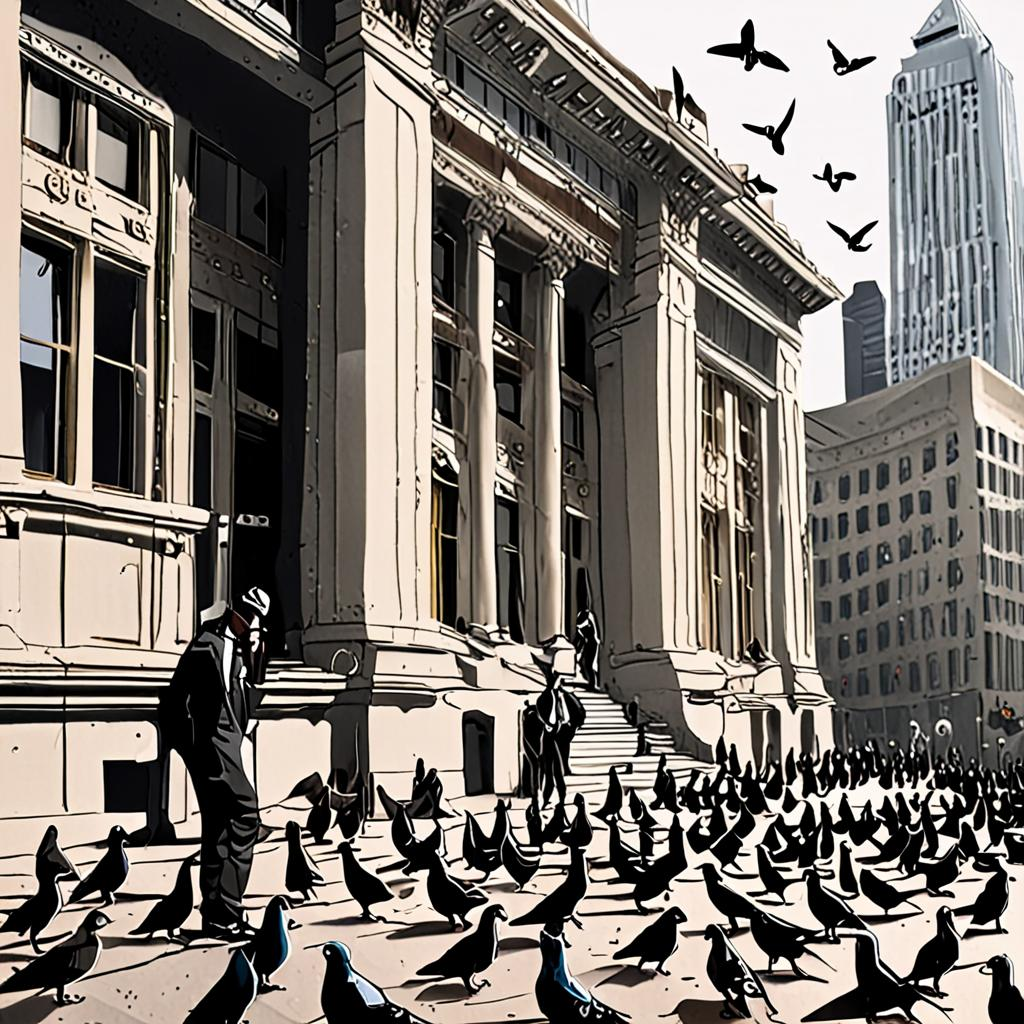

In [3]:
prompt = """
A midday scene in the heart of San Francisco's Financial District, 
with a flock of pigeons circling above a government building. 
The pigeons have robotic features that glint in the sunlight as they 
surveil the bustling streets below. Vitoria and Rafa, dressed in casual attire, 
are seen exchanging concerned glances as they observe the birds' unusual 
behavior. The atmosphere is tense and surreal, with a sense of 
paranoia lingering in the air. The color palette includes muted greys 
and blues, with a metallic sheen reflected in the pigeons' robotic parts.
Make the output hyperrealistic and in 4K quality but also a little ominous!!
"""

def generate_and_display_image_from_summary(summary: str): 
    data = client.workers.ai.with_raw_response.run(
        model_name=MODEL_NAME,
        account_id=ACCOUNT_ID,
        prompt=summary
    )
    display(Image(data.read()))

generate_and_display_image_from_summary(summary=prompt)